<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-132/blob/main/Reto_Entrega_1y2_Aguas_subterraneas_Eq132.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos (Gpo 10)**
###Tecnológico de Monterrey
###Prof titular: Dra. María de la Paz Rico Fernández 
###Prof tutor: Julio César Galindo López    

###Alumno: Luis Fernando Rios Piedra A00453954
###Alumno: David Eduardo Garcia Reyes A01086411

### **Entrega 1 y 2 - Reto BdD Aguas Subterraneas**
###16 Nov 2022

In [391]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests, zipfile
from io import BytesIO

In [392]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [393]:
#Lectura de la base de datos desde el sitio fuente
path = '/content/drive/MyDrive/Cydd/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

df = pd.read_csv(path, encoding = "ISO-8859-1")

df.tail()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1067,OCRBR5109M1,COMUNIDAD LA REFORMA,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.73302,25.09380,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [394]:

df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [395]:
#Se observa que la dimensión/columna SDT_mg/L esta vacía
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

---

*   Inicia Limpieza de datos 

---

In [396]:
#Se observa que hay algunas otras dimensiones con pocos registros nulos.
df.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [397]:
#Se inicia sección para verificar posible imputación cruzando información entre las dimensiones dentro del conjunto de datos que están relacionadas entre si. Por ejemplo,
# el conjunto de datos contiene la dimensión 'ALC_mg/L' y por otro lado hay otra dimensión de tipo categórico CUMPLE_CON_ALC.
df[df['ALC_mg/L'].isnull()].CUMPLE_CON_ALC

406    ND
407    ND
722    ND
861    ND
Name: CUMPLE_CON_ALC, dtype: object

In [398]:
#Si no es posible realizar imputación se remueven los registros.
df.dropna(subset=['ALC_mg/L'],inplace=True)

In [399]:
df[df['CONDUCT_mS/cm'].isnull()].CUMPLE_CON_COND 

18     ND
281    ND
293    ND
616    ND
891    ND
906    ND
Name: CUMPLE_CON_COND, dtype: object

In [400]:
df.dropna(subset=['CONDUCT_mS/cm'],inplace=True)

In [401]:
df[df['SDT_M_mg/L' ].isnull()].CUMPLE_CON_SDT_ra 

175    ND
677    ND
Name: CUMPLE_CON_SDT_ra, dtype: object

In [402]:
df.dropna(subset=['SDT_M_mg/L'],inplace=True)

In [403]:
df[df['DUR_mg/L'   ].isnull()].CUMPLE_CON_DUR

635    ND
Name: CUMPLE_CON_DUR, dtype: object

In [404]:
df.dropna(subset=['DUR_mg/L'],inplace=True)

In [405]:
df[df['N_NO3_mg/L'   ].isnull()].CUMPLE_CON_NO3 

234    ND
Name: CUMPLE_CON_NO3, dtype: object

In [406]:
df.dropna(subset=['N_NO3_mg/L'],inplace=True)

In [407]:
#Se identifica que con la dimensión SDT_mg/L es viable hacer imputación
df[df['SDT_mg/L'].isnull()].CALIDAD_SDT_salin 

0            Potable - Dulce
1            Potable - Dulce
2            Potable - Dulce
3            Potable - Dulce
4       Ligeramente salobres
                ...         
1063    Ligeramente salobres
1064         Potable - Dulce
1065    Ligeramente salobres
1066         Potable - Dulce
1067         Potable - Dulce
Name: CALIDAD_SDT_salin, Length: 1054, dtype: object

In [408]:
#Creando función con escala para realizar imputación de la columna SDT_mg/L.
def SDT_val (SDT):
  np.random.seed(101)
  if SDT =='Potable - Dulce':
    return np.random.randint(1,1001)
  elif SDT=='Ligeramente salobres':
    return np.random.randint(1001,2001)
  elif SDT== 'Salobres':
    return np.random.randint(2001,10001)
  elif SDT== 'Salinas':
    return np.random.randint(10001,30000)

In [409]:
#Además,se crea una función de limpieza para las dimensiones donde hay registros que combinan el símbolo "<" con mediciones. En este caso se usa de referencia las escalas definidas 
#en el documento de "Escalas_subterranea"
def lim_inf (val_min):
  np.random.seed(101)
  if val_min =='<1.1':
    return round(np.random.uniform(0,1.1),1)
  elif val_min =='<0.2':
    return round(np.random.uniform(0,0.2),1)
  elif val_min =='<0.025':
    return round(np.random.uniform(0,0.025),3)
  elif val_min =='<0.02':
    return round(np.random.uniform(0,0.02),2)
  elif val_min =='<0.01':
   return round(np.random.uniform(0,0.01),2)
  elif val_min =='<0.005':
   return round(np.random.uniform(0,0.005),3)
  elif val_min =='<0.003':
   return round(np.random.uniform(0,0.003),3)
  elif val_min =='<0.0015':
   return round(np.random.uniform(0,0.0015),4)
  elif val_min =='<0.0005':
   return round(np.random.uniform(0,0.0005),4)
  elif val_min =='<20':
   return round(np.random.uniform(0,20),1)
  else:
    return val_min


In [410]:
#Método para aplicar la imputación en la columna SDT_mg/L.
df['SDT_mg/L'] = df['CALIDAD_SDT_salin'].apply(SDT_val)

In [411]:
#Método para aplicar la imputación en las distintas columnas con registros combinando mediciones con el símbolo "<". 
df['HG_TOT_mg/L'] = df['HG_TOT_mg/L'].apply(lim_inf)
df['COLI_FEC_NMP/100_mL'] = df['COLI_FEC_NMP/100_mL'].apply(lim_inf)
df['MN_TOT_mg/L'] = df['MN_TOT_mg/L'].apply(lim_inf)
df['CD_TOT_mg/L'] = df['CD_TOT_mg/L'].apply(lim_inf)
df['CR_TOT_mg/L'] = df['CR_TOT_mg/L'].apply(lim_inf)
df['PB_TOT_mg/L'] = df['PB_TOT_mg/L'].apply(lim_inf)
df['AS_TOT_mg/L'] = df['AS_TOT_mg/L'].apply(lim_inf)
df['N_NO3_mg/L'] = df['N_NO3_mg/L'].apply(lim_inf)
df['FE_TOT_mg/L'] = df['FE_TOT_mg/L'].apply(lim_inf)
df['FLUORUROS_mg/L'] = df['FLUORUROS_mg/L'].apply(lim_inf)
df['COLI_FEC_NMP/100_mL'] = df['COLI_FEC_NMP/100_mL'].apply(lim_inf)
df['DUR_mg/L'] = df['DUR_mg/L'].apply(lim_inf)




In [412]:
#Método de limpieza para los registros dentro de la dimensión CONTAMINANTES.
df['CONTAMINANTES'] = df['CONTAMINANTES'].fillna("Ninguno")

In [413]:
#Verificando que la limpieza de datos nulos ha surtido efecto. 
df.isnull().sum()


CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_mg/L                0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L 

In [414]:
#Se observa dentro del conjuto de datos que hay dimensiones de tipo numérico defindos como objetos, p.e. SDT_M_mg/L 
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CLAVE                 1054 non-null   object
 1   SITIO                 1054 non-null   object
 2   ORGANISMO_DE_CUENCA   1054 non-null   object
 3   ESTADO                1054 non-null   object
 4   MUNICIPIO             1054 non-null   object
 5   ACUIFERO              1054 non-null   object
 6   SUBTIPO               1054 non-null   object
 7   CALIDAD_ALC           1054 non-null   object
 8   CALIDAD_CONDUC        1054 non-null   object
 9   SDT_M_mg/L            1054 non-null   object
 10  CALIDAD_SDT_ra        1054 non-null   object
 11  CALIDAD_SDT_salin     1054 non-null   object
 12  FLUORUROS_mg/L        1054 non-null   object
 13  CALIDAD_FLUO          1054 non-null   object
 14  DUR_mg/L              1054 non-null   object
 15  CALIDAD_DUR           1054 non-null   

In [415]:
#Método para corregir el tipo de dato en todas las dimensiones numéricas que aparecen clasificadas como "objetos"
df[['AS_TOT_mg/L','N_NO3_mg/L','COLI_FEC_NMP/100_mL','FLUORUROS_mg/L','SDT_M_mg/L','CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
        'PB_TOT_mg/L',  'MN_TOT_mg/L', 
       'FE_TOT_mg/L','DUR_mg/L']]=df[['AS_TOT_mg/L','N_NO3_mg/L','COLI_FEC_NMP/100_mL','FLUORUROS_mg/L','SDT_M_mg/L','CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
        'PB_TOT_mg/L',  'MN_TOT_mg/L', 
       'FE_TOT_mg/L','DUR_mg/L']].astype('float64')

---

*   Finaliza Limpieza de datos 

---

---

*   Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .

---

In [416]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,1054,1054,DLAGU6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,1054,1052,POZO VILLA UNION,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,1054,13,CUENCAS CENTRALES DEL NORTE,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,1054,32,DURANGO,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,1054,447,LA PAZ,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUIFERO,1054,272,PENINSULA DE YUCATAN,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,1054,8,POZO,1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,1054.0,NaN,NaN,NaN,-101.84827,6.697568,-116.66425,-105.38517,-102.170665,-98.971268,-86.86412
LATITUD,1054.0,NaN,NaN,NaN,23.161796,3.875005,14.56115,20.224857,22.640705,25.50877,32.677713
PERIODO,1054.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


---

*   Identificar correlaciones.

---

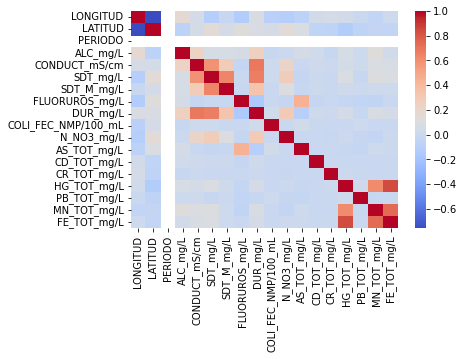

In [417]:
#Revisando correlación entre variables numéricas, 
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(exclude='object').corr(),cmap='coolwarm');

---

*   Identificar medidas de posición no centrales , los cuartiles , outliers.   

---

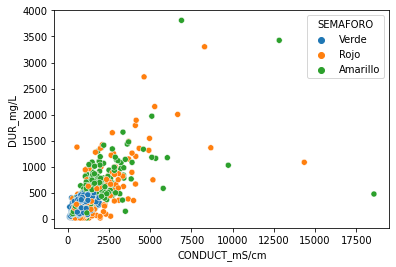

In [418]:
#Se identifica que los datos de las variables CONDUCT_mS/cm y DUR_mg/L presentan un superposición con la cual es posible visibilizar outliers
sns.scatterplot(data=df,x='CONDUCT_mS/cm',y='DUR_mg/L',hue='SEMAFORO');

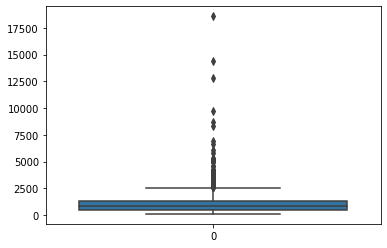

In [419]:
sns.boxplot(data=df['CONDUCT_mS/cm'])

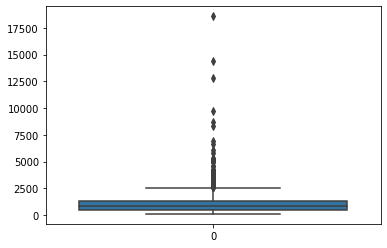

In [420]:
sns.boxplot(data=df['CONDUCT_mS/cm'])

In [421]:
q75,q25=np.percentile(df[['CONDUCT_mS/cm']],[75,25])
upper_limit=q75+1.5*(q75-q25)
upper_limit

2561.0

In [422]:
q75,q25=np.percentile(df[['DUR_mg/L']],[75,25])
upper_limit=q75+1.5*(q75-q25)
upper_limit

956.7749999999999

In [423]:
#Eliminiación de outliers dentro de las variables 'CONDUCT_mS/cm' y 'DUR_mg/L' 2000/690
df1=df[(df['CONDUCT_mS/cm']<2561)&(df['DUR_mg/L']<956)]
df1.shape

(950, 57)

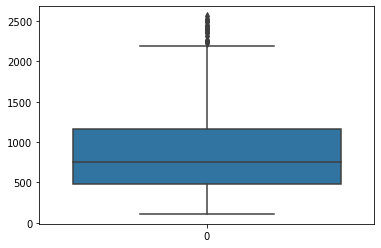

In [424]:
sns.boxplot(data=df1['CONDUCT_mS/cm'])

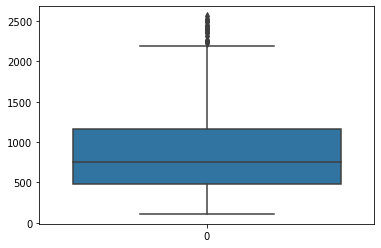

In [425]:
sns.boxplot(data=df1['CONDUCT_mS/cm'])

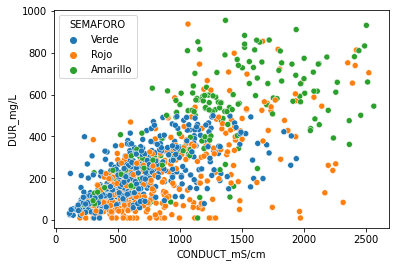

In [426]:
sns.scatterplot(data=df1,x='CONDUCT_mS/cm',y='DUR_mg/L',hue='SEMAFORO');

In [427]:
#Desplegar # de registros después de la eliminación de outliers
print(df1.shape)


(950, 57)




---

*   Finaliza tratamiendo de outliers

---






---

*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

---

In [428]:

sit_est=df[['SITIO','ESTADO','SEMAFORO']]
X= df[['LONGITUD','LATITUD' ]]

In [429]:
from sklearn.cluster import KMeans

In [430]:
#
X = pd.get_dummies(X)
X.head()

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138


Text(0, 0.5, 'SSD')

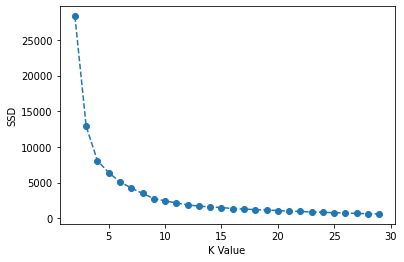

In [431]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(X)
    

    ssd.append(model.inertia_)
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("SSD")

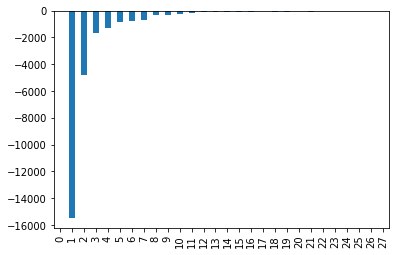

In [432]:
pd.Series(ssd).diff().plot(kind='bar')

In [433]:
model = KMeans(n_clusters=3)
model.fit_predict(X)


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [434]:
X['K=3 Clusters'] = model.labels_

In [435]:
X.corr()['K=3 Clusters'].sort_values()

LATITUD        -0.028581
LONGITUD        0.353803
K=3 Clusters    1.000000
Name: K=3 Clusters, dtype: float64

In [436]:
import plotly.express as px

In [437]:
df_clus_loc=pd.concat([sit_est,X],axis=1)


In [438]:
df_clus_loc.head()


,SITIO,ESTADO,SEMAFORO,LONGITUD,LATITUD,K=3 Clusters
0,POZO SAN GIL,AGUASCALIENTES,Verde,-102.02210,22.20887,0
1,POZO R013 CAÑADA HONDA,AGUASCALIENTES,Verde,-102.20075,21.99958,0
2,POZO COSIO,AGUASCALIENTES,Rojo,-102.28801,22.36685,0
3,POZO EL SALITRILLO,AGUASCALIENTES,Verde,-102.29449,22.18435,0
4,RANCHO EL TECOLOTE,BAJA CALIFORNIA SUR,Rojo,-110.24480,23.45138,1




---

*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

---



In [439]:
import plotly.express as px

fig = px.scatter_mapbox(df_clus_loc, lat="LATITUD", lon="LONGITUD", hover_name="SITIO", hover_data=['ESTADO','SEMAFORO'],color='K=3 Clusters',
                        #color_continuous_scale=['green','yellow','red'], 
                        zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

K-means usa las magnitudes de latitud y longitud para hacer los agrupamientos y esto no tiene relación con el color de SEMAFORO de cada registro, esto quiere decir que dentro de cada cluster podemos encontrar registros clasificados con cualquiera de los tres colores de SEMAFORO (verde, amarillo, rojo).

In [440]:
df1.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [441]:
num_dim=df1.select_dtypes(exclude='object')
cat_dim=df1[['SEMAFORO']]

In [442]:
cat_dim['SEMAFORO']=cat_dim['SEMAFORO'].map({'Verde':0,'Amarillo':1,'Rojo':3})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [443]:
cat_dim=df1['SEMAFORO']
df=pd.concat([num_dim,cat_dim],axis=1)
X = df.drop(columns=['SEMAFORO','LONGITUD','LATITUD','PERIODO'],axis=1)
y = df['SEMAFORO']

In [444]:
X.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L',
       'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
       'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
       'MN_TOT_mg/L', 'FE_TOT_mg/L'],
      dtype='object')

In [445]:
from sklearn.model_selection import train_test_split

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [447]:
from sklearn.tree import DecisionTreeClassifier

In [448]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [449]:
base_pred = model_DT.predict(X_test)

In [450]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [451]:
feat_imp=pd.DataFrame(model_DT.feature_importances_,index=X.columns,columns=['FEATURE IMPORTANCE'])
feat_imp.nlargest(10,columns=['FEATURE IMPORTANCE'])

,FEATURE IMPORTANCE
FLUORUROS_mg/L,0.241248
DUR_mg/L,0.154323
AS_TOT_mg/L,0.107004
COLI_FEC_NMP/100_mL,0.105256
MN_TOT_mg/L,0.099558
N_NO3_mg/L,0.097704
FE_TOT_mg/L,0.070982
ALC_mg/L,0.034910
CR_TOT_mg/L,0.033325
PB_TOT_mg/L,0.024848


In [452]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

    Amarillo       0.91      1.00      0.95        53
        Rojo       0.99      0.95      0.97        98
       Verde       0.99      0.99      0.99       134

    accuracy                           0.98       285
   macro avg       0.97      0.98      0.97       285
weighted avg       0.98      0.98      0.98       285



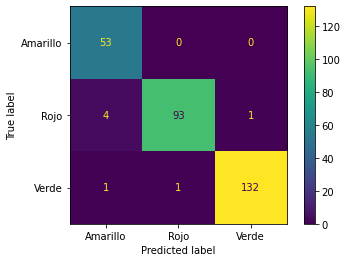

In [453]:
cm = confusion_matrix(y_test, base_pred, labels=model_DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_DT.classes_)
disp.plot()
plt.show()

In [454]:
from sklearn.ensemble import RandomForestClassifier

In [455]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
preds = model_RF.predict(X_test)

In [456]:
feat_imp=pd.DataFrame(model_RF.feature_importances_,index=X.columns,columns=['FEATURE IMPORTANCE'])
feat_imp.nlargest(10,columns=['FEATURE IMPORTANCE'])

,FEATURE IMPORTANCE
FLUORUROS_mg/L,0.230011
DUR_mg/L,0.113276
AS_TOT_mg/L,0.113246
MN_TOT_mg/L,0.091008
N_NO3_mg/L,0.077487
FE_TOT_mg/L,0.076716
COLI_FEC_NMP/100_mL,0.074734
SDT_M_mg/L,0.073759
CONDUCT_mS/cm,0.054813
ALC_mg/L,0.044087


In [457]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

    Amarillo       0.82      1.00      0.90        53
        Rojo       1.00      0.94      0.97        98
       Verde       0.99      0.95      0.97       134

    accuracy                           0.95       285
   macro avg       0.94      0.96      0.95       285
weighted avg       0.96      0.95      0.96       285



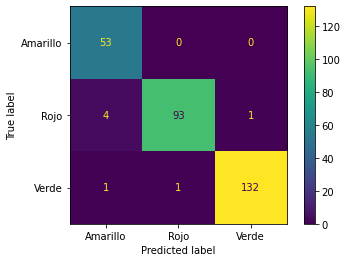

In [458]:
cm = confusion_matrix(y_test, base_pred, labels=model_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_RF.classes_)
disp.plot()
plt.show()